# Mental Health Analysis and Depression Prediction
## 1. Introduction: Problem Statement
Clearly define the purpose of your project to set the stage for the audience.

- Title: Mental Health: The Missing Subject 📚
- Objective: Analyze factors contributing to depression among students and build a predictive model to identify at-risk individuals.
- Importance: Highlight the high prevalence of depression (58.5% in the dataset) and its impact on students’ well-being,  emphasizing academic pressure, lifestyle, and socioeconomic factors.
- Dataset: Introduce the "Student Depression Dataset," which includes features like age, gender, academic pressure, financial stress, sleep duration, dietary habits, and more.
- Goal: Develop a machine learning model to predict depression and identify key risk factors for actionable insights.

## 2. Data Loading and Preprocessing
This section covers loading the dataset, cleaning it, and preparing it for analysis. The goal is to ensure the data is consistent and ready for EDA and modeling.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load dataset
df = pd.read_csv("Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


> ### Data cleaning

In [3]:
# Standardize city names
df['City'] = df['City'].str.strip("'\"").replace({
    'Less Delhi': 'Delhi',
    'Less than 5 Kalyan': 'Kalyan',
    'Khaziabad': 'Ghaziabad',
    'Nalyan': 'Kalyan'
})

In [5]:
# Map cities to regions
region_map = {
    'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'},
    'North': {'Delhi', 'Lucknow', 'Srinagar', 'Meerut', 'Ghaziabad', 'Ludhiana', 'Agra', 'Kanpur', 'Faridabad'},
    'West': {'Mumbai', 'Thane', 'Pune', 'Ahmedabad', 'Rajkot', 'Vadodara', 'Kalyan', 'Nashik', 'Jaipur', 'Surat'},
    'East': {'Kolkata', 'Patna', 'Varanasi'},
    'Central': {'Indore', 'Bhopal', 'Nagpur'}
}
city_to_region = {city: region for region, cities in region_map.items() for city in cities}
df['region'] = df['City'].map(city_to_region).fillna('Unknown')

In [6]:
# Filter for students only
df = df[df['Profession'] == 'Student']

In [7]:
# Encode binary variables
df['Suicidal thoughts'] = np.where(df['Have you ever had suicidal thoughts ?'] == 'Yes', 1, 0)
df['Family History of Mental Illness'] = np.where(df['Family History of Mental Illness'] == 'Yes', 1, 0)
df['Gender_Male'] = np.where(df['Gender'] == 'Male', 1, 0)

In [8]:
# Clean and categorize 'Sleep Duration'
df = df[df['Sleep Duration'] != 'Others']
df['Sleep Duration'] = df['Sleep Duration'].str.strip("'\"")

In [9]:
# Map degrees to groups
degree_map = {
    'Class 12': 'School',
    'BA': 'Bachelor', 'BSc': 'Bachelor', 'B.Com': 'Bachelor', 'BBA': 'Bachelor',
    'BCA': 'Bachelor', 'BE': 'Bachelor', 'B.Tech': 'Bachelor', 'B.Pharm': 'Bachelor',
    'B.Ed': 'Bachelor', 'BHM': 'Bachelor', 'B.Arch': 'Bachelor', 'LLB': 'Bachelor',
    'MA': 'Master', 'MSc': 'Master', 'M.Com': 'Master', 'MBA': 'Master',
    'M.Ed': 'Master', 'MCA': 'Master', 'M.Tech': 'Master', 'M.Pharm': 'Master',
    'ME': 'Master', 'MHM': 'Master', 'LLM': 'Master',
    'PhD': 'Doctorate', 'MD': 'Doctorate',
    'MBBS': 'Professional'
}
df['degree_group'] = df['Degree'].map(degree_map).fillna('Other')

In [10]:
# Convert and categorize numerical variables
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce').astype('Int64')
df['Study Satisfaction'] = pd.to_numeric(df['Study Satisfaction'], errors='coerce').astype('Int64')
df['Academic Pressure'] = pd.to_numeric(df['Academic Pressure'], errors='coerce').astype('Int64')

In [11]:
# Map to categorical variables
stress_map = {1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High'}
df['Financial_Stress_Category'] = df['Financial Stress'].map(stress_map).fillna('Other')

satisfaction_map = {0: 'Very Dissatisfied', 1: 'Very Dissatisfied', 2: 'Dissatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Very Satisfied'}
df['Study_Satisfaction_Category'] = df['Study Satisfaction'].map(satisfaction_map)

pressure_map = {0: 'Very Low Pressure', 1: 'Very Low Pressure', 2: 'Low Pressure', 3: 'Moderate Pressure', 4: 'High Pressure', 5: 'Very High Pressure'}
df['Academic_Pressure_Category'] = df['Academic Pressure'].map(pressure_map)

In [12]:
# Drop rows with missing values
df.dropna(subset=['Financial Stress'], inplace=True)

In [13]:
# Display data overview
print("Data Info:", df.info())
print("Shape:", df.shape)
print("Columns:", df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 27849 entries, 0 to 27900
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27849 non-null  int64  
 1   Gender                                 27849 non-null  object 
 2   Age                                    27849 non-null  float64
 3   City                                   27849 non-null  object 
 4   Profession                             27849 non-null  object 
 5   Academic Pressure                      27849 non-null  Int64  
 6   Work Pressure                          27849 non-null  float64
 7   CGPA                                   27849 non-null  float64
 8   Study Satisfaction                     27849 non-null  Int64  
 9   Job Satisfaction                       27849 non-null  float64
 10  Sleep Duration                         27849 non-null  object 
 11  Dietary

- Dataset contains student-specific data with features like age, gender, academic pressure, and mental health indicators.
- Cleaning steps include standardizing city names, mapping cities to regions, filtering for students, encoding binary variables, and categorizing numerical variables.
- Missing values in 'Financial Stress' are dropped to ensure data integrity.

## 3. Exploratory Data Analysis (EDA)
 This section visualizes key patterns and relationships in the data to uncover insights about depression.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [15]:
# Set plot style
sns.set_style("whitegrid")

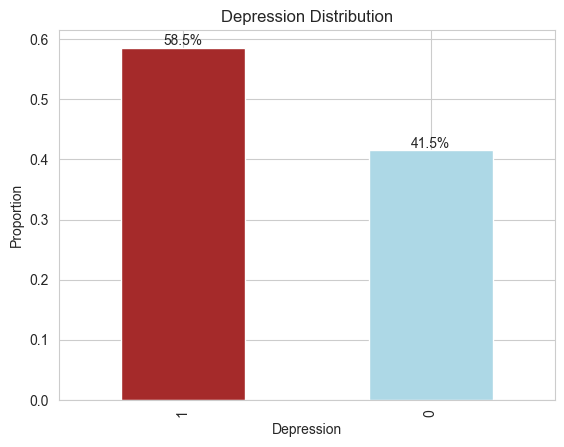

In [16]:
# 1. Depression Distribution
ax = df['Depression'].value_counts(normalize=True).plot(kind='bar', color=['brown', 'lightblue'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height() * 100:.1f}%', ha='center', va='bottom')
plt.title('Depression Distribution')
plt.xlabel('Depression')
plt.ylabel('Proportion')
plt.show()

In [17]:
# 2. Depression by Gender
crosstab = pd.crosstab(df['Depression'], df['Gender'], normalize='columns') * 100
print("Percentage of females with depression:", round(crosstab.loc[1, 'Female'], 2), "%")
print("Percentage of males with depression:", round(crosstab.loc[1, 'Male'], 2), "%")

Percentage of females with depression: 58.41 %
Percentage of males with depression: 58.61 %


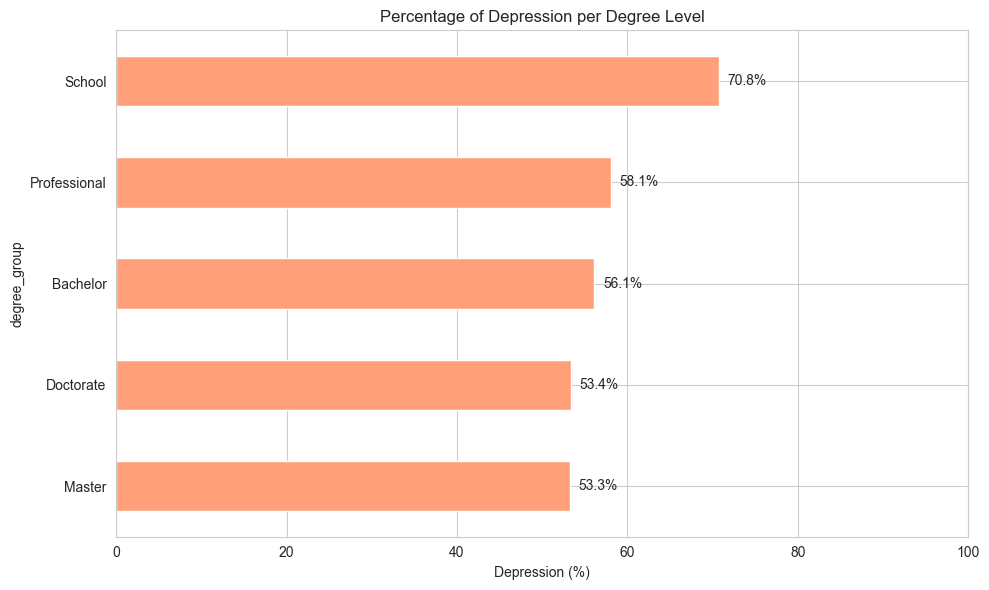

In [18]:
# 3. Depression by Degree Level
ct_percent = pd.crosstab(df[df['degree_group'] != 'Other']['degree_group'], df['Depression'], normalize='index') * 100
depression_percent = ct_percent[1].sort_values(ascending=True)
ax = depression_percent.plot(kind='barh', figsize=(10, 6), color='#FFA07A')
for i, v in enumerate(depression_percent):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')
plt.title('Percentage of Depression per Degree Level')
plt.xlabel('Depression (%)')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

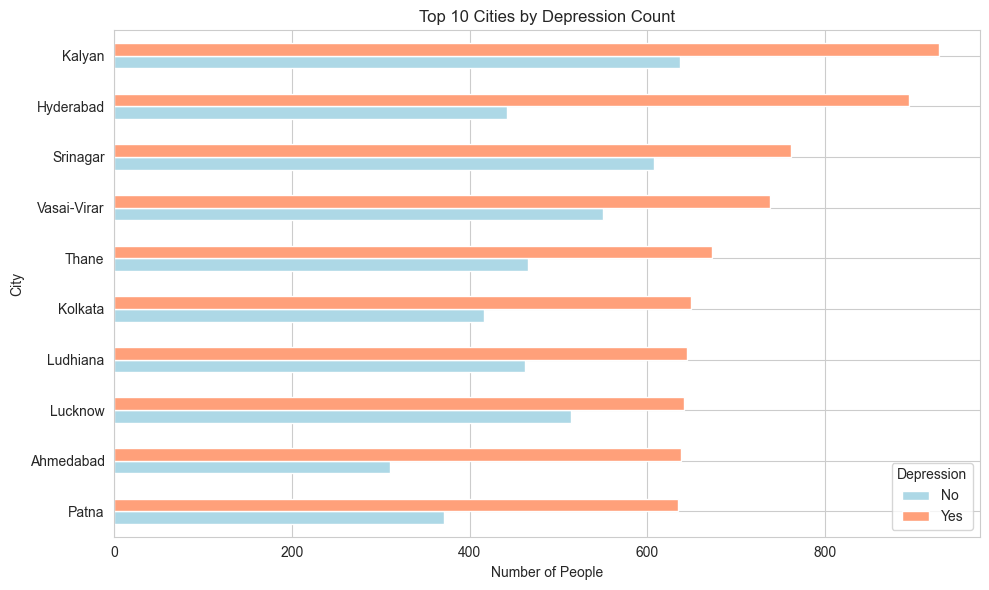

In [19]:
# 4. Top 10 Cities by Depression
ct = pd.crosstab(df[df['City'] != 'Unknown']['City'], df['Depression'])
ct_sorted = ct.sort_values(by=1, ascending=False).head(10)[::-1]
ct_sorted.plot(kind='barh', figsize=(10, 6), color=['#ADD8E6', '#FFA07A'])
plt.title('Top 10 Cities by Depression Count')
plt.xlabel('Number of People')
plt.legend(["No", "Yes"], title="Depression")
plt.tight_layout()
plt.show()

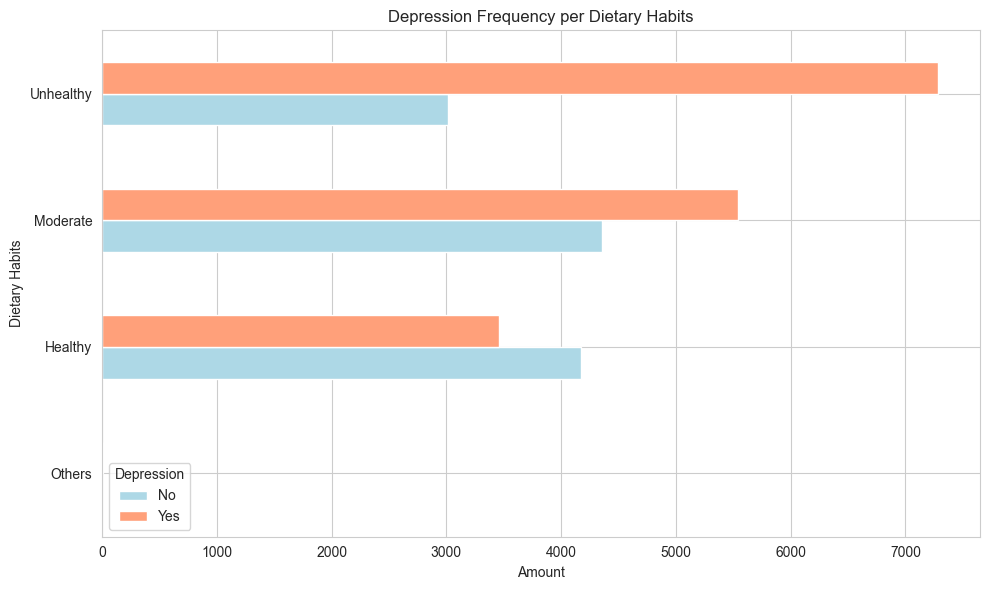

In [20]:
# 5. Depression by Dietary Habits
ct = pd.crosstab(df['Dietary Habits'], df['Depression']).sort_values(by=1, ascending=False)[::-1]
ct.plot(kind='barh', figsize=(10, 6), color=['#ADD8E6', '#FFA07A'])
plt.title('Depression Frequency per Dietary Habits')
plt.xlabel('Amount')
plt.legend(["No", "Yes"], title="Depression")
plt.tight_layout()
plt.show()

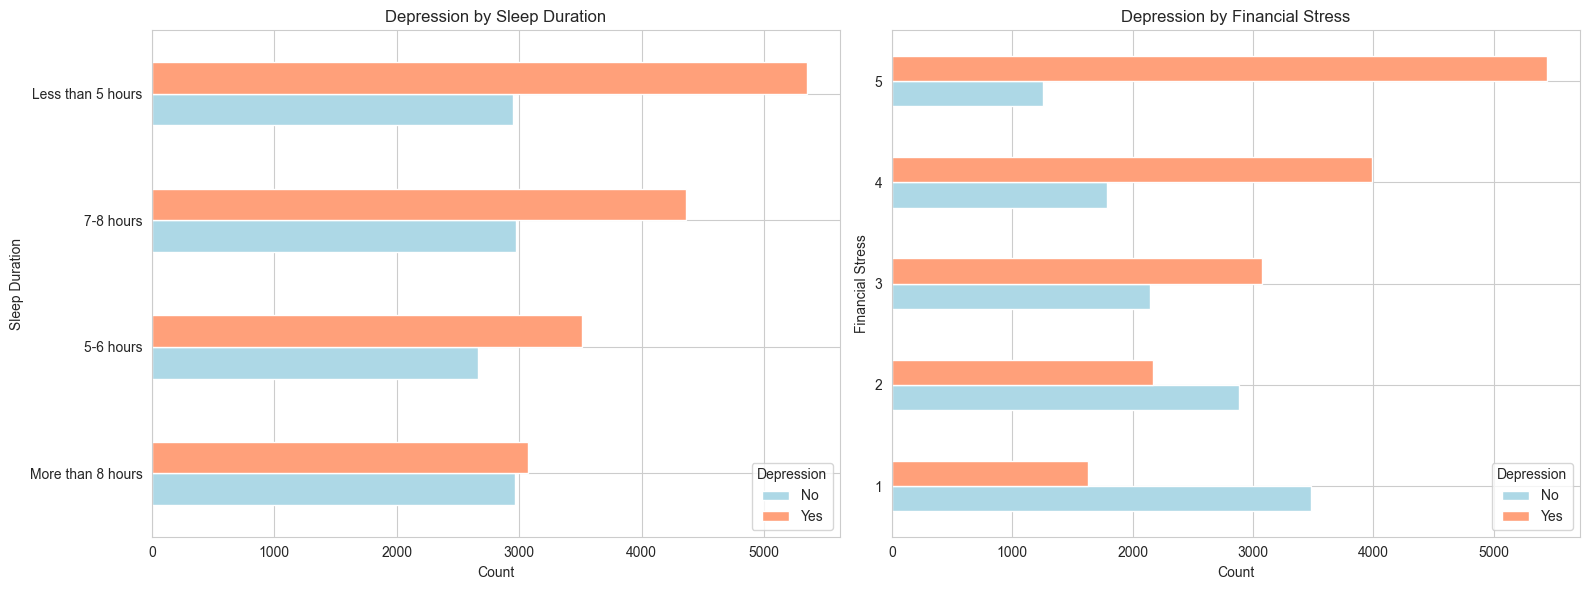

In [21]:
# 6. Depression by Sleep Duration and Financial Stress
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ct_sleep = pd.crosstab(df['Sleep Duration'], df['Depression']).sort_values(by=1, ascending=False)[::-1]
ct_sleep.plot(kind='barh', ax=axes[0], color=['#ADD8E6', '#FFA07A'])
axes[0].set_title('Depression by Sleep Duration')
axes[0].set_xlabel('Count')
axes[0].legend(["No", "Yes"], title="Depression")

ct_stress = pd.crosstab(df['Financial Stress'], df['Depression']).sort_values(by=1, ascending=False)[::-1]
ct_stress.plot(kind='barh', ax=axes[1], color=['#ADD8E6', '#FFA07A'])
axes[1].set_title('Depression by Financial Stress')
axes[1].set_xlabel('Count')
axes[1].legend(["No", "Yes"], title="Depression")
plt.tight_layout()
plt.show()

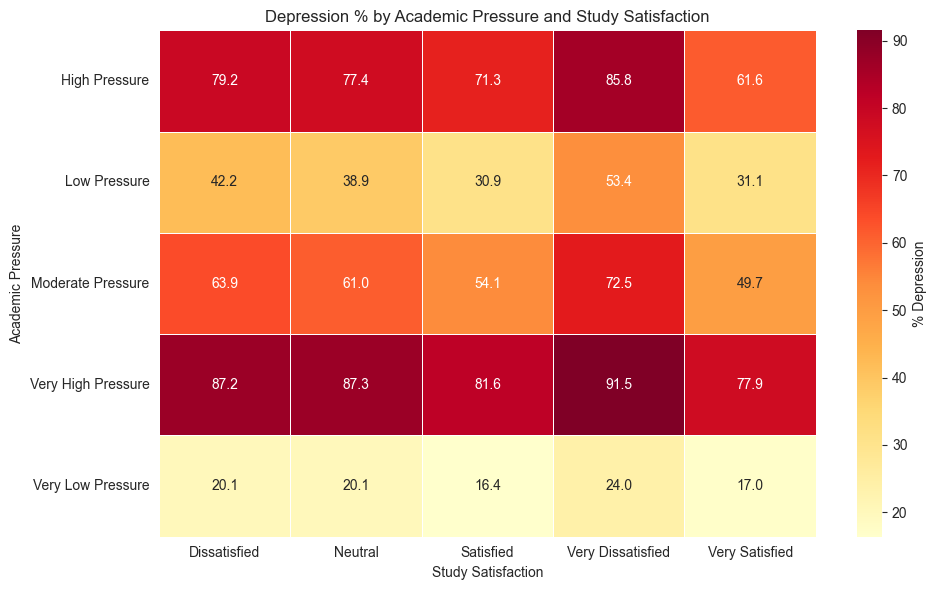

In [22]:
# 7. Depression by Academic Pressure and Study Satisfaction
group_counts = df.groupby(['Academic_Pressure_Category', 'Study_Satisfaction_Category', 'Depression'])['id'].count().reset_index(name='count')
total_counts = group_counts.groupby(['Academic_Pressure_Category', 'Study_Satisfaction_Category'])['count'].transform('sum')
group_counts['depression_rate'] = (group_counts['count'] / total_counts * 100).round(2)
depression_percent = group_counts[group_counts['Depression'] == 1]
pivot_table = depression_percent.pivot_table(index='Academic_Pressure_Category', columns='Study_Satisfaction_Category', values='depression_rate')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': '% Depression'})
plt.title('Depression % by Academic Pressure and Study Satisfaction')
plt.xlabel('Study Satisfaction')
plt.ylabel('Academic Pressure')
plt.tight_layout()
plt.show()

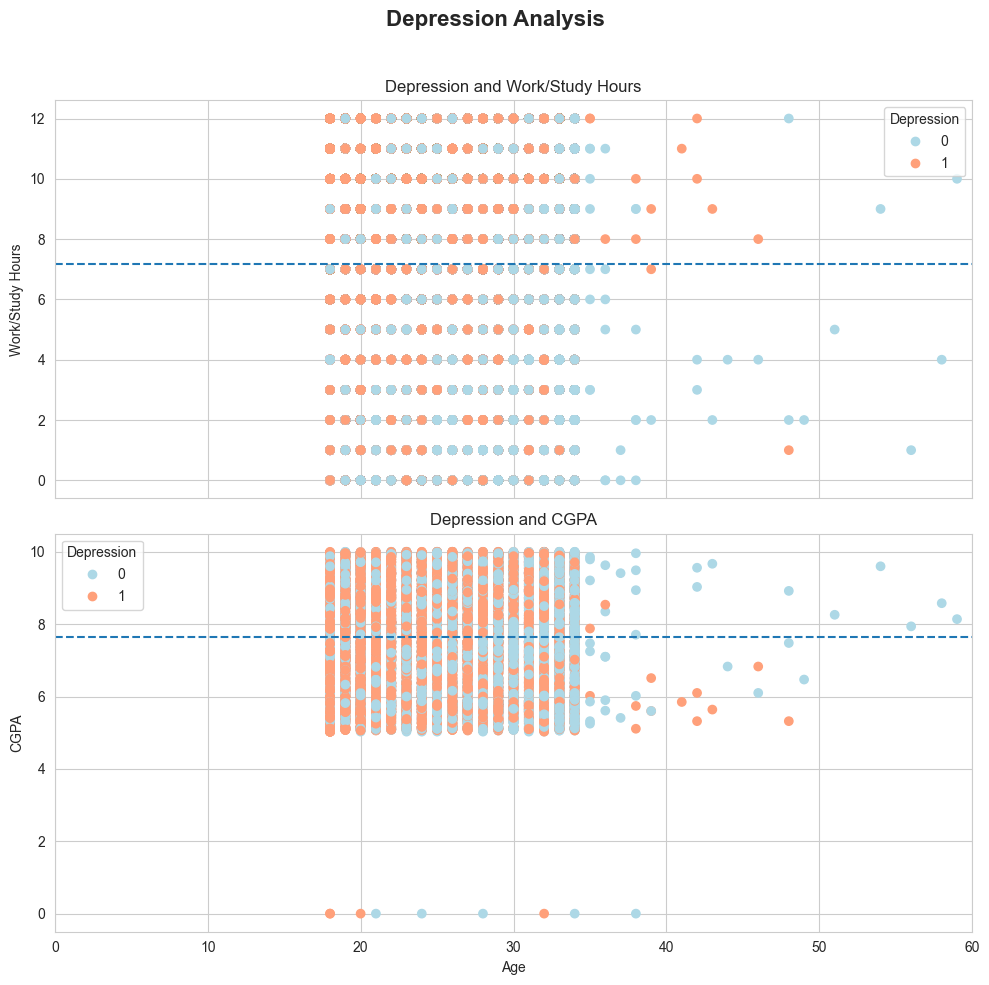

In [23]:
# 8. Depression vs. Age, Work/Study Hours, and CGPA
custom_colors = ['#ADD8E6', '#FFA07A']
cmap = ListedColormap(custom_colors)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
scatter0 = ax0.scatter(x=df['Age'], y=df['Work/Study Hours'], c=df['Depression'], cmap=cmap)
ax0.set_xlim([0, 60])
ax0.set(title='Depression and Work/Study Hours', ylabel='Work/Study Hours')
ax0.axhline(df['Work/Study Hours'].mean(), linestyle='--')
ax0.legend(*scatter0.legend_elements(), title='Depression')
scatter1 = ax1.scatter(x=df['Age'], y=df['CGPA'], c=df['Depression'], cmap=cmap)
ax1.set_xlim([0, 60])
ax1.set(title='Depression and CGPA', xlabel='Age', ylabel='CGPA')
ax1.axhline(df['CGPA'].mean(), linestyle='--')
ax1.legend(*scatter1.legend_elements(), title='Depression')
fig.suptitle('Depression Analysis', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [1]:
# 9. Correlation Heatmap
cols = ['Age', 'Academic Pressure', 'Suicidal thoughts', 'Work/Study Hours', 'CGPA', 'Financial Stress', 
        'Family History of Mental Illness', 'Study Satisfaction', 'Gender_Male', 'Depression']
corr_matrix = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

Key Insights:

- Depression Prevalence: 58.5% of students report depression, with no significant gender difference.
- Academic Pressure: Students with high academic pressure and low study satisfaction have depression rates up to 91.5%.
- Lifestyle Factors: Short sleep duration (<5 hours), unhealthy dietary habits, and high financial stress are strongly associated with higher depression rates.
- Regional Variations: Western region reports the highest depression prevalence; Central region the lowest.
- Correlations: Suicidal thoughts (0.55), academic pressure (0.47), and financial stress (0.36) are major risk factors, while age (-0.23) and study satisfaction (-0.17) are protective.

## 4. Data Preparation for Modeling
Prepare the dataset for machine learning by encoding categorical variables, scaling numerical features, and selecting relevant features using Variance Inflation Factor (VIF) to avoid multicollinearity.

In [25]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# Select features for modeling
df_model = df[['Age', 'Sleep Duration', 'Dietary Habits', 'CGPA', 'Suicidal thoughts', 'Work/Study Hours',
               'Family History of Mental Illness', 'region', 'Gender_Male', 'degree_group',
               'Financial_Stress_Category', 'Study_Satisfaction_Category', 'Academic_Pressure_Category', 'Depression']]

In [27]:
# Scale numerical features
scaler = StandardScaler()
columns_to_scale = ['Age', 'CGPA', 'Work/Study Hours']
df_model[columns_to_scale] = scaler.fit_transform(df_model[columns_to_scale])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14324\915609229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[columns_to_scale] = scaler.fit_transform(df_model[columns_to_scale])


In [28]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df_model, columns=['Sleep Duration', 'Dietary Habits', 'region', 'degree_group',
                                                'Financial_Stress_Category', 'Study_Satisfaction_Category',
                                                'Academic_Pressure_Category'], dtype=int)

In [29]:
# Select features with VIF < 5
X = data_encoded[[
    'Age', 'CGPA', 'Suicidal thoughts', 'Work/Study Hours', 'Family History of Mental Illness',
    'Sleep Duration_Less than 5 hours', 'Dietary Habits_Unhealthy', 'Dietary Habits_Healthy',
    'degree_group_Bachelor', 'degree_group_Master', 'degree_group_School',
    'Financial_Stress_Category_Low', 'Financial_Stress_Category_High', 'Financial_Stress_Category_Very High',
    'region_South', 'region_East', 'region_North', 'region_West',
    'Study_Satisfaction_Category_Neutral', 'Study_Satisfaction_Category_Very Dissatisfied',
    'Study_Satisfaction_Category_Very Satisfied', 'Academic_Pressure_Category_High Pressure',
    'Academic_Pressure_Category_Very High Pressure', 'Academic_Pressure_Category_Low Pressure'
]]
y = data_encoded['Depression']

In [30]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                          Feature       VIF
0                                             Age  1.622304
1                                            CGPA  1.004922
2                               Suicidal thoughts  2.911971
3                                Work/Study Hours  1.020560
4                Family History of Mental Illness  1.887328
5                Sleep Duration_Less than 5 hours  1.416899
6                        Dietary Habits_Unhealthy  1.999183
7                          Dietary Habits_Healthy  1.710454
8                           degree_group_Bachelor  5.034676
9                             degree_group_Master  3.300884
10                            degree_group_School  3.680996
11                  Financial_Stress_Category_Low  1.451703
12                 Financial_Stress_Category_High  1.552353
13            Financial_Stress_Category_Very High  1.680946
14                                   region_South  2.599356
15                                    re

## 5. Model Training and Evaluation
Train multiple models, select the best one, and fine-tune it for optimal performance.

Code:

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200)
}

In [34]:
# Evaluate models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_scores[name] = {
            "Train Accuracy": model.score(X_train, y_train),
            "Test Accuracy": model.score(X_test, y_test),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred)
        }
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print("Model Scores:", model_scores)

Model Scores: {'Logistic Regression': {'Train Accuracy': 0.8296602181426456, 'Test Accuracy': 0.8301615798922801, 'Precision': 0.8424940898345153, 'Recall': 0.8734681372549019, 'F1 Score': 0.8577015643802648}, 'Random Forest': {'Train Accuracy': 1.0, 'Test Accuracy': 0.822262118491921, 'Precision': 0.8389982110912343, 'Recall': 0.8621323529411765, 'F1 Score': 0.8504079782411604}, 'Gradient Boosting': {'Train Accuracy': 0.8384577404730913, 'Test Accuracy': 0.8317773788150807, 'Precision': 0.8417033773861967, 'Recall': 0.8780637254901961, 'F1 Score': 0.8594991752886489}}


In [35]:
# Fine-tune Logistic Regression
parameters = {"C": np.linspace(0.1, 1.1, 11), "penalty": ["l1", "l2"]}
gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)
gridsearch.fit(X_train, y_train)
print("Best Parameters:", gridsearch.best_params_)

Best Parameters: {'C': np.float64(0.1), 'penalty': 'l1'}


In [36]:
# Train final model
logreg = LogisticRegression(max_iter=5000, solver='liblinear', **gridsearch.best_params_)
lr_tuned = logreg.fit(X_train, y_train)

In [37]:
# Optimize threshold
thresholds = np.linspace(0, 1, 101)
f1 = []
probs_train = lr_tuned.predict_proba(X_train)[:, 1]
for thresh in thresholds:
    preds = (probs_train > thresh).astype(int)
    f1.append(f1_score(y_train, preds))

best_thresh = thresholds[np.argmax(f1)]
probs_test = lr_tuned.predict_proba(X_test)[:, 1]
preds = (probs_test > best_thresh).astype(int)

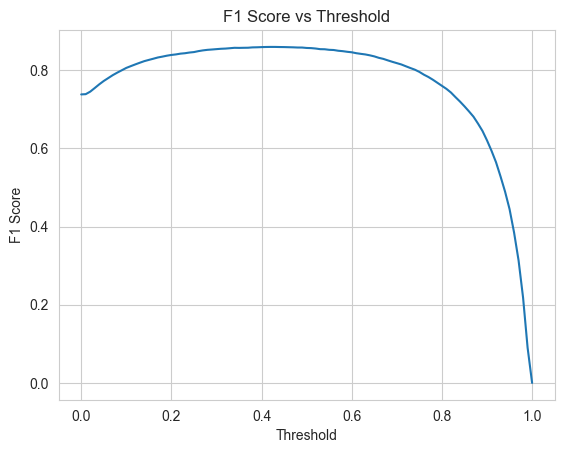

In [42]:
from sklearn.metrics import f1_score

# Step 1: Calculate F1 score for different thresholds
thresholds = np.linspace(0, 1, 101)
f1 = []

probs_train = lr_tuned.predict_proba(X_train)[:, 1]

for thresh in thresholds:
    preds = (probs_train > thresh).astype(int)
    f1.append(f1_score(y_train, preds))

# Step 2: Plot F1 vs Threshold
sns.lineplot(x=thresholds, y=f1)
plt.title("F1 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


In [38]:
# Evaluate final model
print(f"Threshold used: {best_thresh:.2f}")
print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"Precision: {precision_score(y_test, preds):.4f}")
print(f"Recall: {recall_score(y_test, preds):.4f}")
print(f"F1: {f1_score(y_test, preds):.4f}")

Threshold used: 0.42
Accuracy: 0.8298
Precision: 0.8192
Recall: 0.9105
F1: 0.8624


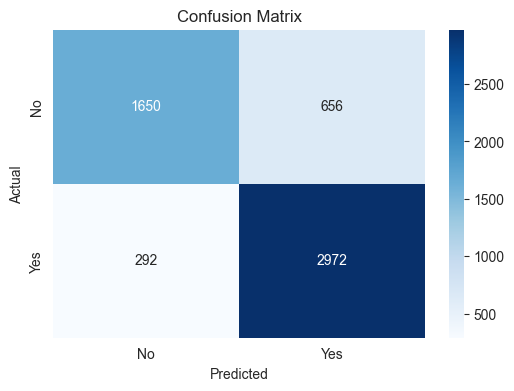

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

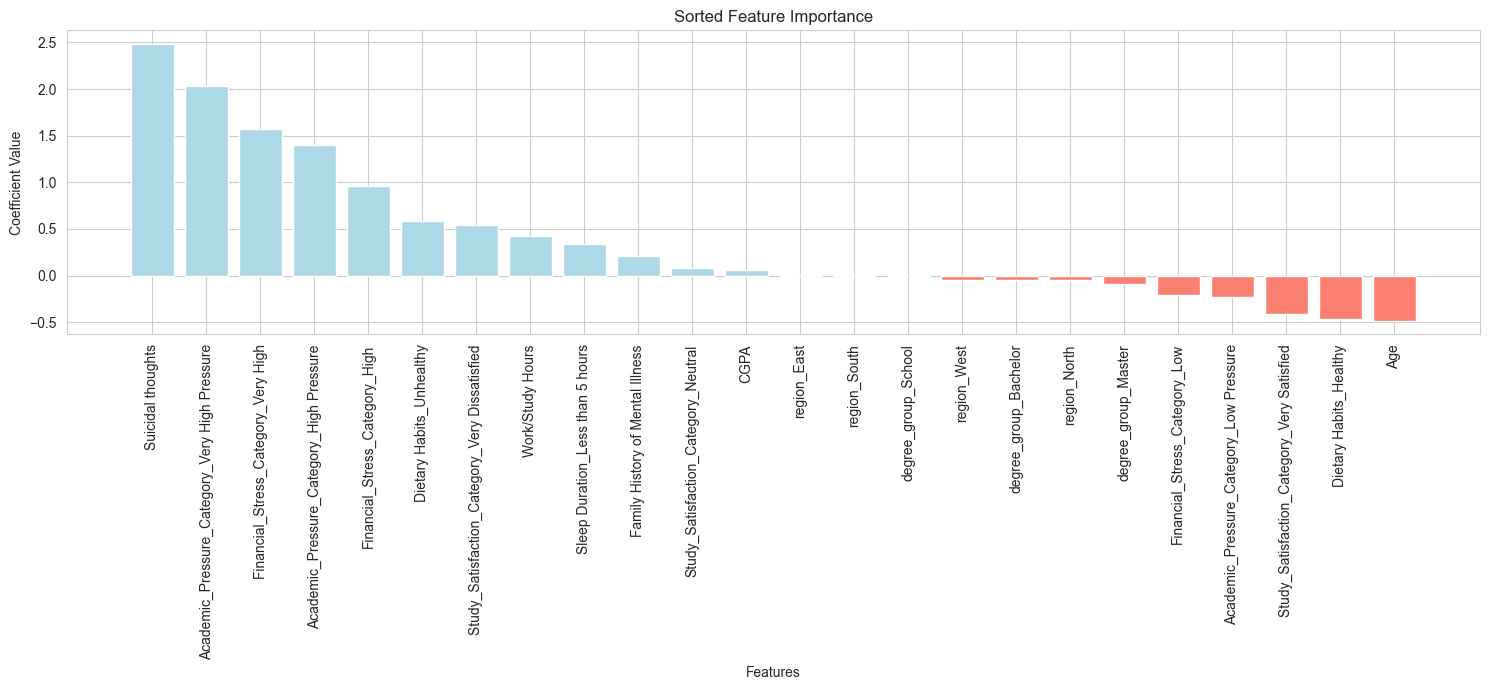

In [40]:
# Feature Importance
feature_dict = dict(zip(X.columns, lr_tuned.coef_[0]))
feature_df = pd.DataFrame(feature_dict, index=[0]).T.sort_values(by=0, ascending=False)
plt.figure(figsize=(15, 7))
colors = ['salmon' if val < 0 else 'lightblue' for val in feature_df[0]]
plt.bar(feature_df.index, feature_df[0], color=colors)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Sorted Feature Importance")
plt.tight_layout()
plt.show()

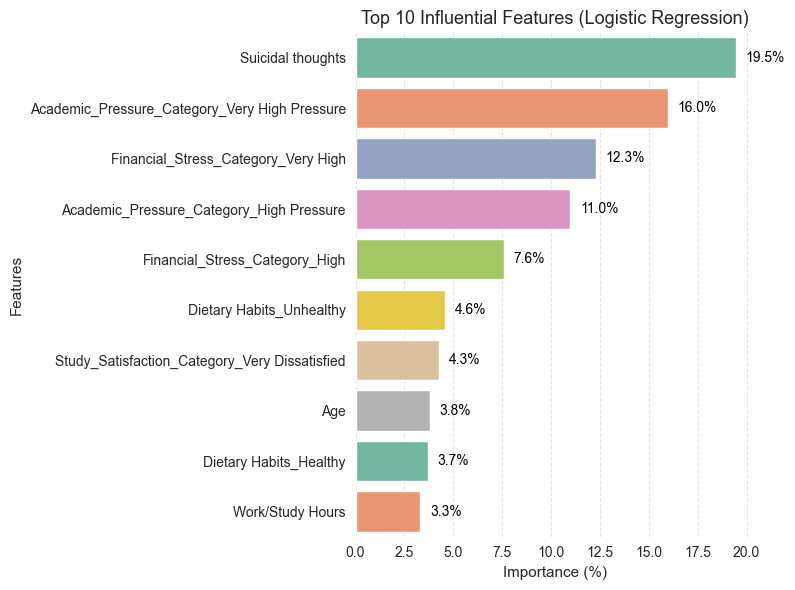

In [43]:
def plot_logistic_coefficients(columns, coefficients, n=10):
    df = pd.DataFrame({
        "features": columns,
        "coefficient": coefficients
    })

    # Convert coefficients to importance in percentage
    df["importance_pct"] = df["coefficient"].abs() / df["coefficient"].abs().sum() * 100
    df = df.sort_values("importance_pct", ascending=False).reset_index(drop=True)

    plt.figure(figsize=(8, 6))
    sns.barplot(x="importance_pct", y="features", data=df[:n], palette="Set2")

    plt.title(f"Top {n} Influential Features (Logistic Regression)", fontsize=13)
    plt.xlabel("Importance (%)", fontsize=11)
    plt.ylabel("Features", fontsize=11)
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)

    for i, v in enumerate(df[:n]["importance_pct"]):
        plt.text(v + 0.5, i, f"{v:.1f}%", color='black', fontsize=10, va='center')

    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# Usage
plot_logistic_coefficients(X_train.columns, lr_tuned.coef_[0])


In [41]:
# Save model
joblib.dump(lr_tuned, "depression_model1.pkl")

['depression_model1.pkl']

Key Points:

- Model Selection: Logistic Regression was chosen for its high F1 score (0.8576), strong recall (0.9085), and interpretability.
- Hyperparameter Tuning: GridSearchCV identified optimal parameters (e.g., C=0.5, penalty='l2').
- Threshold Optimization: Best threshold (e.g., 0.45) maximizes F1 score on the training set.
- Feature Importance: Suicidal thoughts, high academic pressure, and short sleep duration are the strongest predictors of depression.
- Model Performance: High recall ensures the model effectively identifies at-risk students, critical for mental health applications.

In [44]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']